# Preliminary Results

Preliminary analysis over the Stack Overflow questions under the react-native tag.

## Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import dtale
import dtale.app as dtale_app
import plotly.graph_objs as go

## Dataset

The dataset was collected from e Stack Exchange Data Explorer and saved on a csv file, `StackOverflowQuestions.csv`.

In [2]:
df = pd.read_csv('../tables/StackOverflowQuestions.csv')

In [3]:
# Remove the CreationDate hours, so the questions can be grouped by day
df['CreationDate'] = pd.to_datetime(df['CreationDate']).dt.date

In [4]:
dtale.show(df, host='localhost', port=40000)

### Dataset basic data information

In [5]:
number_of_rows = len(df.index)

print('The dataset has {} Stack Overflow questions.'.format(number_of_rows))

The dataset has 107535 Stack Overflow questions.


In [6]:
print('The dataset contains the following attributes:\n')

for label in df.columns:
    print(label)

The dataset contains the following attributes:

Id
PostTypeId
AcceptedAnswerId
ParentId
CreationDate
DeletionDate
Score
ViewCount
Body
OwnerUserId
OwnerDisplayName
LastEditorUserId
LastEditorDisplayName
LastEditDate
LastActivityDate
Title
Tags
AnswerCount
CommentCount
FavoriteCount
ClosedDate
CommunityOwnedDate
ContentLicense


## Word Clouds

The fisrt analisis on the dataset is the questions titles and tags world clouds.

In [7]:
def make_wordcloud(column_name):
    column = df.dropna(subset=[column_name], axis=0)[column_name]
    all_inputs = ' '.join(s for s in column)
    
    # Remove too common words and html common tags    
    stopwords=['and', 'to', 'how', 'is', 'in', 'on', 'with',
               'p', 'i', 'href', 'gt', 'lt', 'quot', 'pre',
               'code', 'nofollow', 'noreferrer', 'style']
    
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=1600, height=800).generate(all_inputs)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
 
    plt.imshow(wordcloud);
    wordcloud.to_file('../images/questions_{}_wordcloud.png'.format(column_name.lower()))

### Title Word Cloud

In [8]:
make_wordcloud('Title')

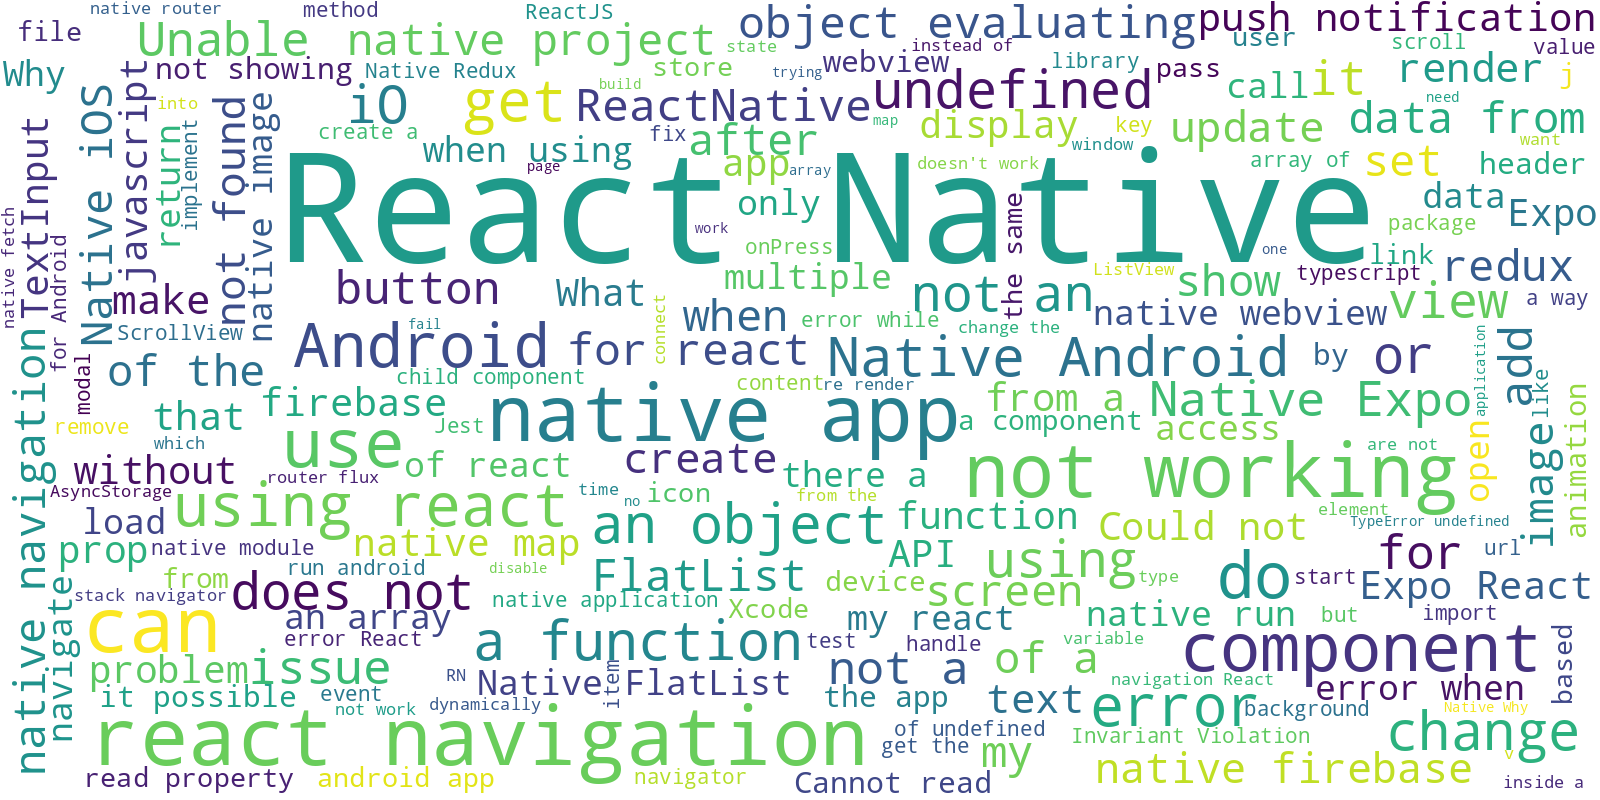

In [9]:
Image(filename='../images/questions_title_wordcloud.png')

### Tags Word Cloud

In [10]:
make_wordcloud('Tags')

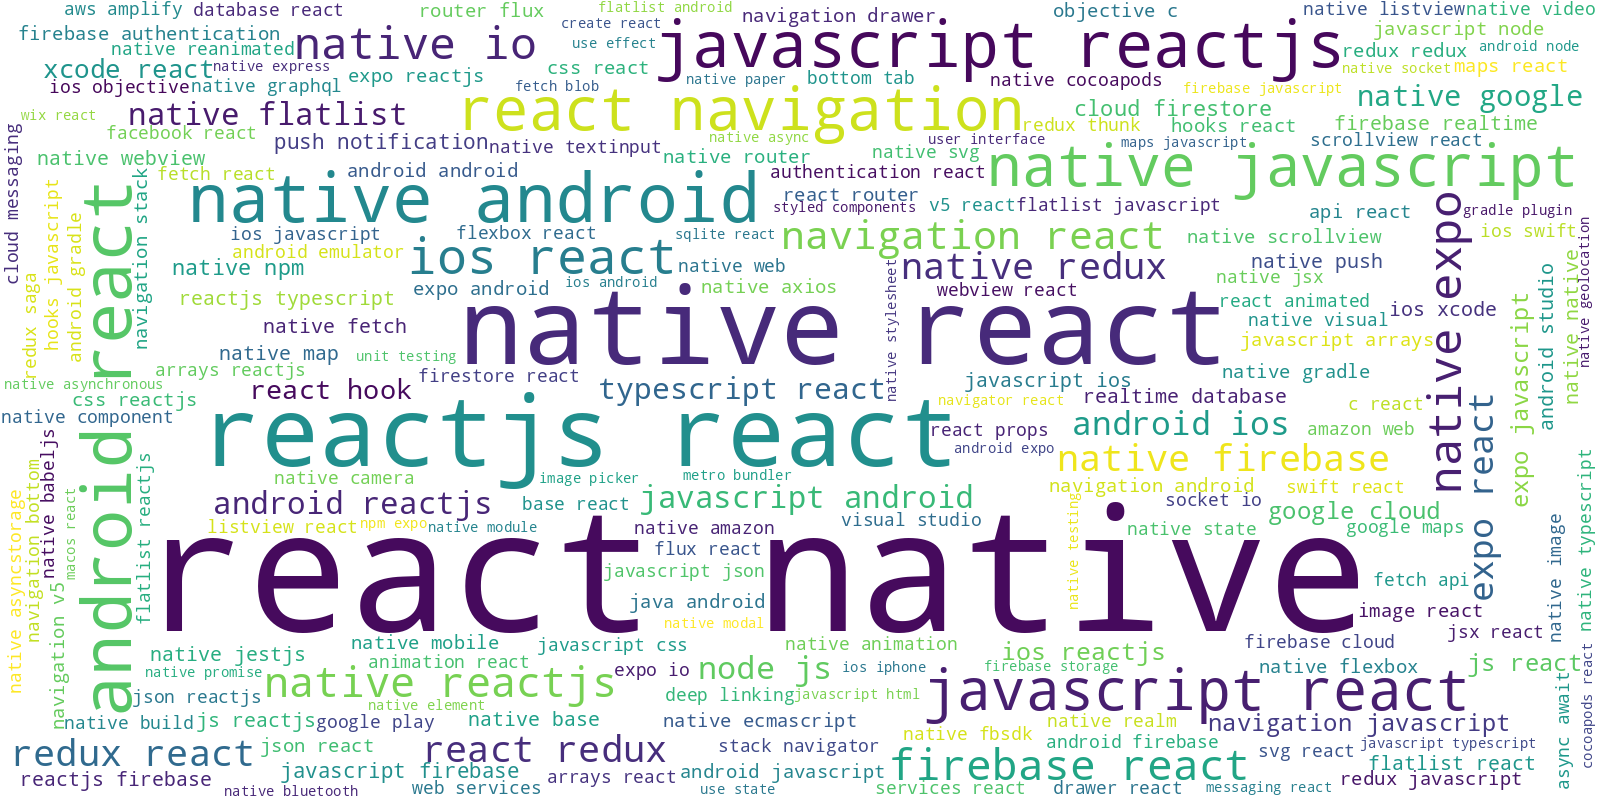

In [11]:
Image(filename='../images/questions_tags_wordcloud.png')

## Body Word Cloud

In [12]:
make_wordcloud('Body')

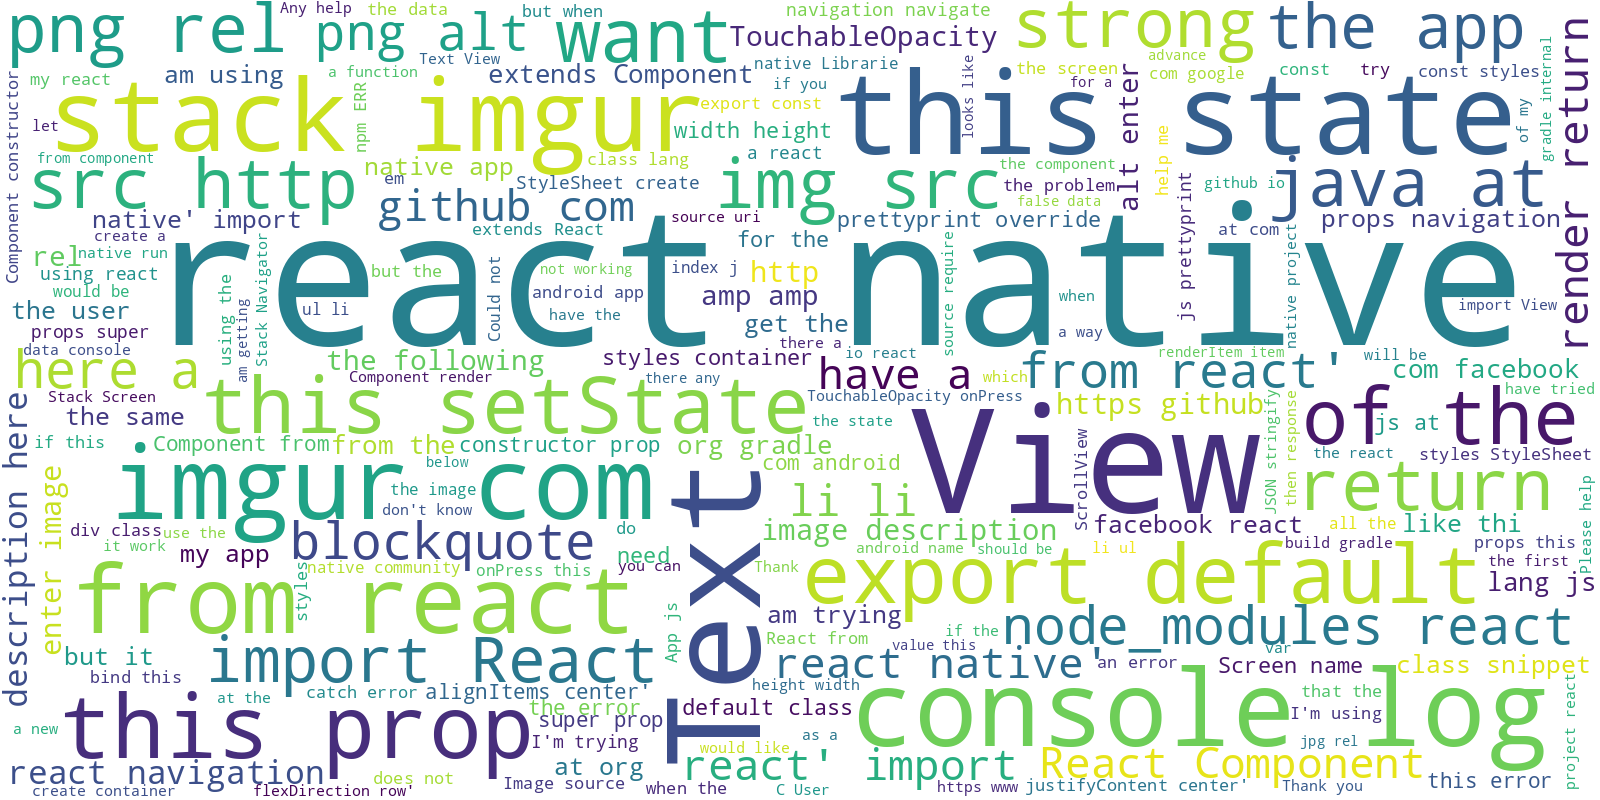

In [13]:
Image(filename='../images/questions_body_wordcloud.png')

## Amount of data over time

Using the D-Tale chart options, it was possible to mesure the amount of questions made over time and how the questions attributes is affected over time. The result was exported into png images that are displayed bellow.

### Amount of questions over time

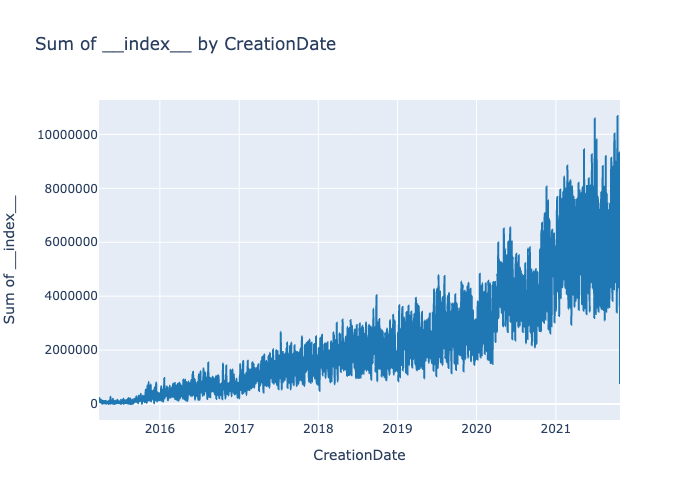

In [14]:
Image(filename='../images/amount_questions_by_date.png')

### Amount of answers on questions over time

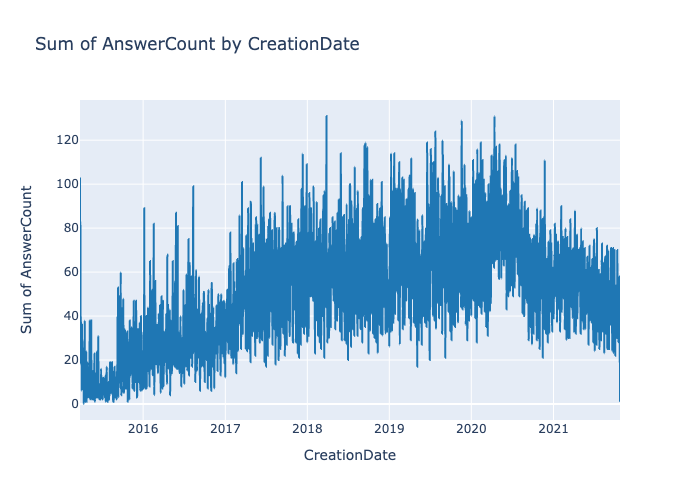

In [15]:
Image(filename='../images/amount_answer_by_date.png')

### Amount of comments on questions over time

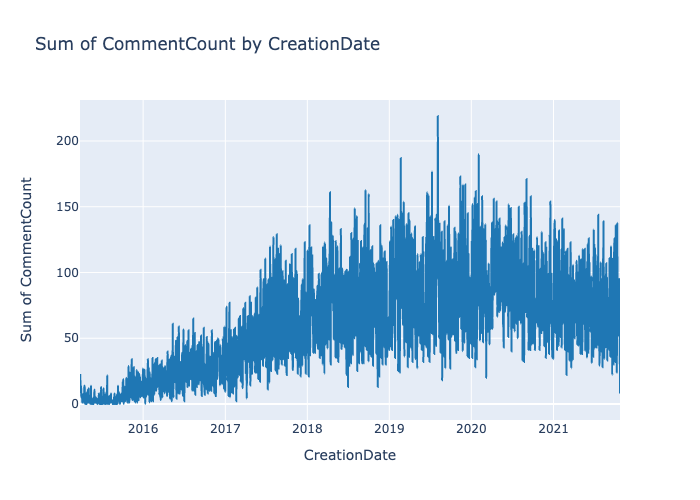

In [16]:
Image(filename='../images/amount_comment_by_date.png')

### Amount of favorites on questions over time

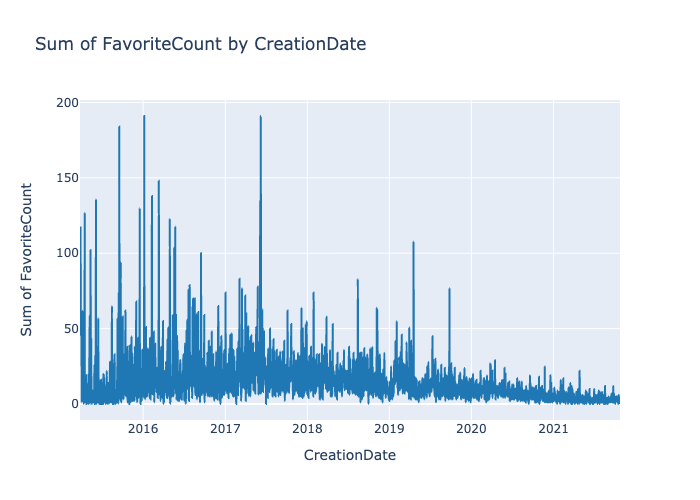

In [17]:
Image(filename='../images/amount_favorite_by_date.png')

### Amount of score on questions over time

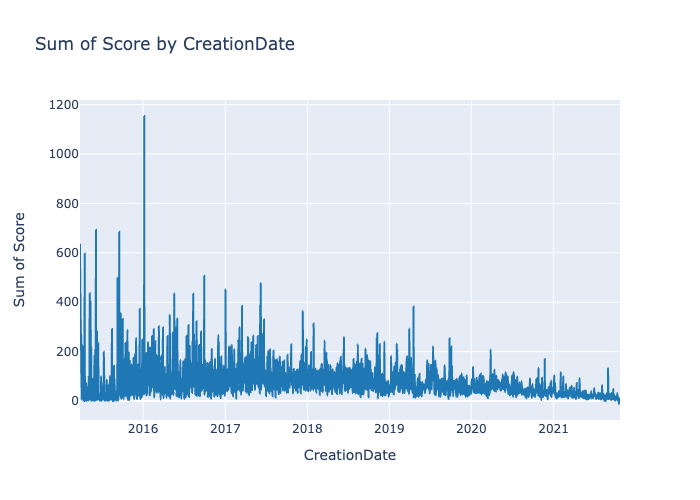

In [18]:
Image(filename='../images/amount_score_by_date.png')

### Amount of views on questions over time

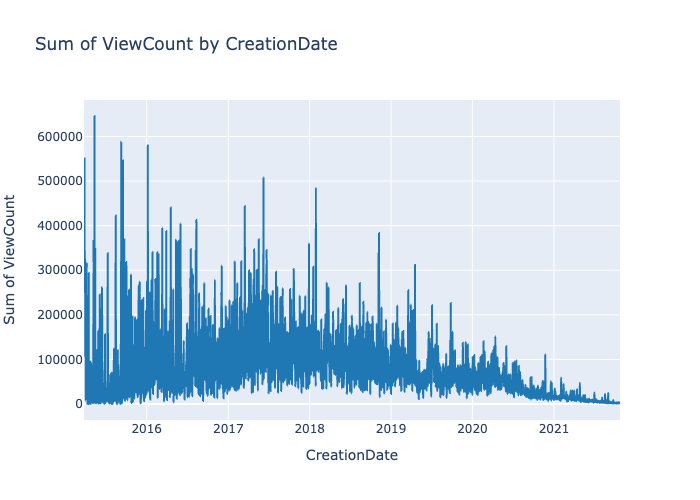

In [19]:
Image(filename='../images/amount_viewcount_by_date.png')